## Análisis de datos - Clase 4

### Desbalance

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [5]:
# Función para calcular la entropía de Shannon
def shannon_entropy(y):
    probs = y.value_counts(normalize=True)
    return -np.sum(probs * np.log2(probs))


In [6]:
# Cargar dataset Titanic
df = sns.load_dataset("titanic")[["sex", "age", "fare", "class", "embark_town", "survived"]].dropna()
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["class"] = df["class"].map({"Third": 3, "Second": 2, "First": 1})

# Cargar dataset Titanic
df = sns.load_dataset("titanic")[["sex", "age", "fare", "class", "embark_town", "survived"]].dropna()
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["class"] = df["class"].map({"Third": 3, "Second": 2, "First": 1})
df = pd.get_dummies(df, columns=["embark_town"], drop_first=True)

X = df.drop(columns=["survived"])
y = df["survived"]

In [7]:
# Evaluación del desbalance
print("Proporción de clases:")
print(y.value_counts(normalize=True))
entropy_original = shannon_entropy(y)
print("\nEntropía de Shannon:", entropy_original)

Proporción de clases:
survived
0    0.595506
1    0.404494
Name: proportion, dtype: float64

Entropía de Shannon: 0.9735190023846809


In [8]:
# Separa en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Modelo base (original))
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\nMétricas (datos originales):")
print(classification_report(y_test, y_pred))


Métricas (datos originales):
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        85
           1       0.72      0.71      0.71        58

    accuracy                           0.77       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



In [10]:
# Oversampling con SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

entropy_smote = shannon_entropy(y_train_sm)
print("\nEntropía de Shannon después de SMOTE:", entropy_smote)
clf.fit(X_train_sm, y_train_sm)
y_pred_sm = clf.predict(X_test)
print("\nMétricas con SMOTE:")
print(classification_report(y_test, y_pred_sm))



Entropía de Shannon después de SMOTE: 1.0

Métricas con SMOTE:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        85
           1       0.70      0.74      0.72        58

    accuracy                           0.77       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



In [11]:
# Undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_us, y_train_us = undersample.fit_resample(X_train, y_train)

entropy_undersample = shannon_entropy(y_train_us)
print("\nEntropía de Shannon después de Undersampling:", entropy_undersample)
clf.fit(X_train_us, y_train_us)
y_pred_us = clf.predict(X_test)
print("\nMétricas con Undersampling:")
print(classification_report(y_test, y_pred_us))


Entropía de Shannon después de Undersampling: 1.0

Métricas con Undersampling:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        85
           1       0.68      0.83      0.74        58

    accuracy                           0.77       143
   macro avg       0.77      0.78      0.77       143
weighted avg       0.79      0.77      0.77       143



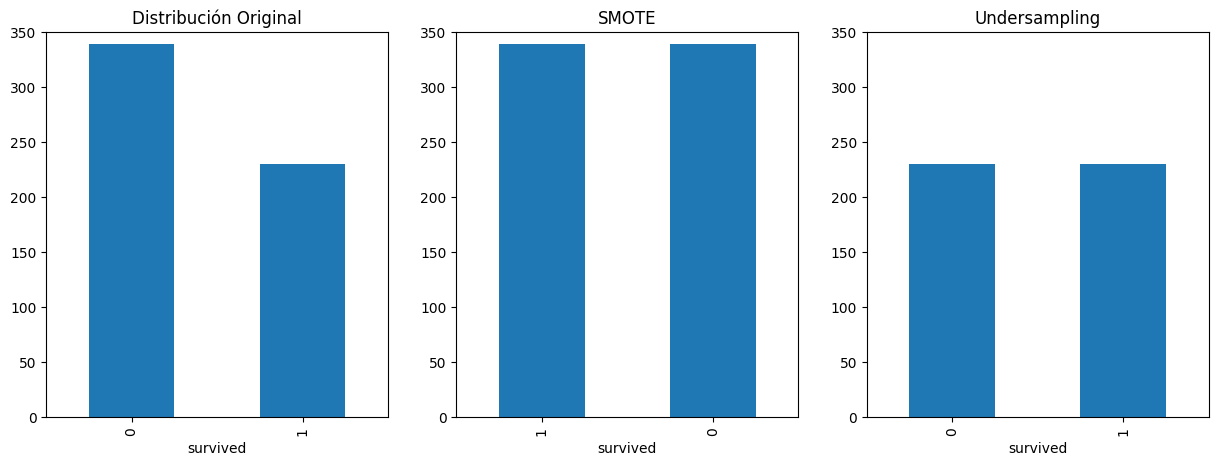

In [12]:
# Graficar distribución original y balanceada
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
y_train.value_counts().plot(kind='bar', ax=axes[0], title='Distribución Original')
y_train_sm.value_counts().plot(kind='bar', ax=axes[1], title='SMOTE')
y_train_us.value_counts().plot(kind='bar', ax=axes[2], title='Undersampling')

for i in (0,1,2):
  axes[i].set_ylim(0,350)

plt.show()
